# 3.1 - Data Cleaning


![cleaning](images/cleaning.jpg)


$$$$

Una vez que hemos conseguido los datos necesarios, es necesario observar su calidad y orden. No se trata de un análisis exploratorio de los datos, sino de ver como de sucios y desordenados están nuestros datos. Cuando los datos tienen problemas de calidad decimos que los datos están sucios. Los problemas de calidad están relacionados con valores nulos, datos inconsistentes, tipo de dato incorrecto y registros duplicados. 


$$$$
![assess](images/data_assess.png)
$$$$
$$$$

Por otro lado, el orden de los datos está relacionado con su estructura. Como dice [Hadley Wickham](http://hadley.nz/) en su paper [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), los datos están ordenados cuando:

+ Cada variable forma una columna.
+ Cada observación forma una fila.
+ Cada tipo de unidad obsservacional forma una tabla.
$$$$
![clean](images/data_clean.png)




# Ejemplo...

### Importaciones y carga de datos.

In [1]:
import pandas as pd

import numpy as np

pd.set_option('display.max_columns', None)  # es para enseñar todas las columnas del df

import warnings
warnings.simplefilter('ignore')   # es para quitar warnings

In [2]:
df=pd.read_csv('../data/vehicles_messy.csv')

df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Exploración

In [3]:
dim_original=df.shape

df.shape  # dimensiones del dataframe

(37843, 83)

In [4]:
df.columns  # columnas

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [5]:
df.make.value_counts()  # cuenta el nº de marcas de coche

Chevrolet                      3795
Ford                           3102
Dodge                          2513
GMC                            2389
Toyota                         1919
                               ... 
ASC Incorporated                  1
Volga Associated Automobile       1
Panoz Auto-Development            1
Panos                             1
Mahindra                          1
Name: make, Length: 133, dtype: int64

In [6]:
df.dtypes   # tipo de datos

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [7]:
df.info(memory_usage='deep')   # informacion del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [8]:
# columnas con valores nulos

nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [9]:
len(df)

37843

In [10]:
nan_cols[nan_cols > 1e4].index

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

### Borrado de columnas con más de 10.000 valores nulos

In [11]:
df.drop(columns=nan_cols[nan_cols > 1e4].index, inplace=True)

In [12]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

### Exploración columnas `cylinders` y `displ`

In [13]:
bad_index=df.cylinders[df.cylinders.isna()].index   # indices de valores nulos en cilindros

bad_index[:10]

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 21413], dtype='int64')

In [14]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].head() 

,make,model,fuelType,cylinders,displ
7138,Nissan,Altra EV,Electricity,NaN,NaN
7139,Toyota,RAV4 EV,Electricity,NaN,NaN
8143,Toyota,RAV4 EV,Electricity,NaN,NaN
8144,Ford,Th!nk,Electricity,NaN,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN,NaN


**Espera, son eléctricos, de hecho existe un Mazda con motor rotatorio. Efectivamente no tienen cilindros ni cilindrada**

In [15]:
df[['cylinders', 'displ']]=df[['cylinders', 'displ']].fillna(0) # rellenar dos columnas con 0

In [16]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].head() 

,make,model,fuelType,cylinders,displ
7138,Nissan,Altra EV,Electricity,0.0,0.0
7139,Toyota,RAV4 EV,Electricity,0.0,0.0
8143,Toyota,RAV4 EV,Electricity,0.0,0.0
8144,Ford,Th!nk,Electricity,0.0,0.0
8146,Ford,Explorer USPS Electric,Electricity,0.0,0.0


In [17]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

drive    1189
trany      11
dtype: int64

### Exploración columna `drive`

In [18]:
bad_index=df.drive[df.drive.isna()].index   # indice donde drive es nulo

bad_index[:10]

Int64Index([7138, 8144, 8147, 18217, 18218, 18219, 18220, 18221, 18222, 18223], dtype='int64')

In [19]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'drive']].head(10) 

,make,model,fuelType,drive
7138,Nissan,Altra EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8147,Nissan,Hyper-Mini,Electricity,NaN
18217,Alfa Romeo,Spider Veloce 2000,Regular,NaN
18218,Bertone,X1/9,Regular,NaN
18219,Chevrolet,Corvette,Regular,NaN
18220,Chevrolet,Corvette,Regular,NaN
18221,Nissan,300ZX,Regular,NaN
18222,Nissan,300ZX,Regular,NaN
18223,Nissan,300ZX,Regular,NaN


**Este es el punto donde siempre hay que decidir. ¿Qué nos conviene más, borrar registros o rellenar con un `unknown`?**

In [20]:
df.drive=df.drive.fillna('unknown')  # sobreescribo la columna

In [21]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

trany    11
dtype: int64

In [22]:
df[df.drive=='unknown'].head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
7138,0.240000,0.0,0.0,0.0,81,0.0,0,0.0,0.0,41.0,0.0,0,-1,0.0,0.000000,85,0.0,0,0.0,40.0,0.0,0.0,0.0,0.0,unknown,0,-1,800,0,Electricity,Electricity,-1,-1,91,0.0,0,0.0,0.0,37.0,0.0,0,0,16423,0,0,Nissan,Altra EV,N,False,0,0,90,0.0,0.0,0.0,0.0,NaN,116.2069,0.0,129.6154,0.0,Midsize Station Wagons,2000,2750,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
8144,0.312000,0.0,0.0,0.0,74,0.0,0,0.0,0.0,46.0,0.0,0,-1,0.0,0.000000,65,0.0,0,0.0,52.0,0.0,0.0,0.0,0.0,unknown,0,-1,1000,0,Electricity,Electricity,-1,-1,58,0.0,0,0.0,0.0,59.0,0.0,0,0,17329,0,0,Ford,Th!nk,N,False,0,0,29,0.0,0.0,0.0,0.0,NaN,105.3125,0.0,82.1951,0.0,Two Seaters,2001,1750,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
8147,0.270000,0.0,0.0,0.0,84,0.0,0,0.0,0.0,40.0,0.0,0,-1,0.0,0.000000,75,0.0,0,0.0,45.0,0.0,0.0,0.0,0.0,unknown,0,-1,900,0,Electricity,Electricity,-1,-1,66,0.0,0,0.0,0.0,51.0,0.0,0,0,17331,0,0,Nissan,Hyper-Mini,N,False,0,0,33,0.0,0.0,0.0,0.0,NaN,120.3571,0.0,93.6111,0.0,Two Seaters,2001,2250,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
18217,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,unknown,9002,-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,26561,0,0,Alfa Romeo,Spider Veloce 2000,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.0000,0.0,35.0000,0.0,Two Seaters,1984,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
18218,14.982273,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,unknown,12710,-1,1500,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,0.0,0.0,0.0,0,0,26562,0,0,Bertone,X1/9,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,25.0000,0.0,36.0000,0.0,Two Seaters,1984,-750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


### Exploración columna `trany`

In [23]:
df.trany.head()

0       Manual 5-spd
1       Manual 5-spd
2       Manual 5-spd
3    Automatic 3-spd
4       Manual 5-spd
Name: trany, dtype: object

In [24]:
df.trany[df.trany.isna()].index  

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 19097,
            19128],
           dtype='int64')

In [25]:
df.trany=df.trany.fillna('unknown')  # sobreescribo la columna

In [26]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

**Hasta aquí la limpieza de nulos.**

### Eliminación de duplicados

In [27]:
len(df.drop_duplicates())==len(df)  # no hay duplicados

True

In [28]:
df=df.drop_duplicates()  # elimina duplicados por filas

### Columnas constantes o de baja varianza

Nos fijaremos en las columnas numéricas.

In [58]:
# columnas ctes

cte_cols=[]

for c in df.select_dtypes(include=np.number):   # para cada columna numerica...
    
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

['city08U',
 'co2',
 'comb08U',
 'feScore',
 'ghgScore',
 'highway08U',
 'hlv',
 'hpv',
 'lv2',
 'pv2']

In [59]:
df=df.drop(cte_cols, axis=1)  # elimina las columnas ctes

In [31]:
# columnas de baja varianza

low_var=[]

for c in df.select_dtypes(include=np.number):   # para cada columna numerica...
    
    minimo=df[c].min()
    
    per_90=np.percentile(df[c], 90)
    
    if per_90==minimo:
        
        low_var.append(c)

In [32]:
len(low_var)

32

In [33]:
df=df.drop(low_var, axis=1)  # elimina las columnas de baja varianza

df.shape

(37843, 37)

### Outliers (datos atípicos)

Outlier se refiere a esos registros con valores extremos, fuera del rango intercuartil. Dichos valores podrín ser datos verdaderos o fallos de registro. Sea como fuere, se suelen eliminar estos registros porque podrían desplazar la media de una manera ficticia. Esto es, la robustez de los datos. Los datos atípicos 'pesan más' que los datos cercanos a la media. Un solo valor es suficiente para influenciar enormemente la media del conjunto de datos. Esta vez nos fijaremos en los datos por filas.

In [34]:
# stats desc

stats=df.describe().T

stats['IQR']=stats['75%'] - stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
pv4,37843.0,33.769125,45.914462,0.0,0.0,0.0,91.0000,192.0000,91.0000
UCity,37843.0,22.587229,9.350163,0.0,18.0,21.0,25.1393,197.5771,7.1393
UHighway,37843.0,33.619221,10.048326,0.0,27.1,33.0,38.1096,159.1000,11.0096
year,37843.0,2000.064398,10.390588,1984.0,1990.0,2001.0,2009.0000,2017.0000,19.0000
youSaveSpend,37843.0,-2658.999022,2553.098329,-22250.0,-4250.0,-2500.0,-750.0000,4000.0000,3500.0000


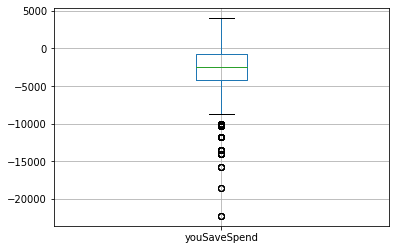

In [35]:
df[['youSaveSpend']].boxplot();   

In [36]:
outliers=pd.DataFrame(columns=stats.index)  # df vacio


outliers

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,engId,feScore,fuelCost08,ghgScore,highway08,highway08U,hlv,hpv,id,lv2,lv4,pv2,pv4,UCity,UHighway,year,youSaveSpend


In [37]:
for e in stats.index:

    iqr=stats.at[e, 'IQR']   # dame el valor de e=indice, IQR=columna
    
    cutoff=1.5*iqr   # test de Tukey
    
    lower=stats.at[e, '25%'] - cutoff
    upper=stats.at[e, '75%'] + cutoff
    
    res=df[(df[e] < lower) | (df[e] > upper)].copy()
    
    res['outliers']=e
    
    outliers=outliers.append(res, sort=True)
    
    
outliers['outliers'].value_counts()

city08U           7299
highway08U        7299
comb08U           7299
engId             6677
lv2               6250
pv2               6239
co2               5854
ghgScore          5815
feScore           5815
hlv               4615
hpv               4614
city08            1470
UCity             1440
lv4               1357
highway08          996
comb08             969
UHighway           893
cylinders          853
co2TailpipeGpm     830
fuelCost08         604
youSaveSpend       604
barrels08          432
displ               43
Name: outliers, dtype: int64

In [39]:
clean_index=[i for i in df.index if i not in outliers.index]

len(clean_index)

16435

In [40]:
df=df.iloc[clean_index]

df.shape

(16435, 37)

In [41]:
outliers.shape

(78267, 38)

In [53]:
outliers.head()

,UCity,UHighway,VClass,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,createdOn,cylinders,displ,drive,engId,feScore,fuelCost08,fuelType,fuelType1,ghgScore,highway08,highway08U,hlv,hpv,id,lv2,lv4,make,model,modifiedOn,mpgData,outliers,phevBlended,pv2,pv4,trany,year,youSaveSpend
47,11.0,15.0,Vans,32.961,9,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,Regular,Regular Gasoline,-1,11,0.0,0,0,1004,0,0,Dodge,B150/B250 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
58,12.0,15.0,Vans,32.961,10,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2854,-1,3350,Regular,Regular Gasoline,-1,11,0.0,0,0,1005,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
69,12.0,15.0,Vans,32.961,10,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2850,-1,3350,Regular,Regular Gasoline,-1,11,0.0,0,0,1006,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
80,11.0,14.0,Vans,32.961,9,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,Regular,Regular Gasoline,-1,10,0.0,0,0,1007,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 3-spd,1985,-10000
275,11.0,16.0,Standard Pickup Trucks,32.961,9,0.0,-1,888.7,10,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,7.4,Rear-Wheel Drive,4880,-1,3350,Regular,Regular Gasoline,-1,12,0.0,0,0,10245,0,0,Chevrolet,C1500 Pickup 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,Automatic 4-spd,1993,-10000


In [55]:
outliers['outliers'].value_counts()

city08U           7299
highway08U        7299
comb08U           7299
engId             6677
lv2               6250
pv2               6239
co2               5854
ghgScore          5815
feScore           5815
hlv               4615
hpv               4614
city08            1470
UCity             1440
lv4               1357
highway08          996
comb08             969
UHighway           893
cylinders          853
co2TailpipeGpm     830
fuelCost08         604
youSaveSpend       604
barrels08          432
displ               43
Name: outliers, dtype: int64

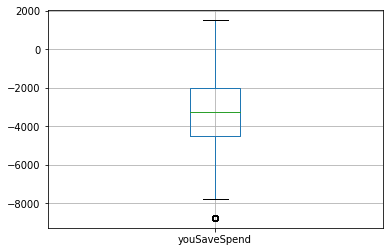

In [56]:
df[['youSaveSpend']].boxplot();  

### Colinealidad  

Columnas con la misma información.

In [62]:
df.corr().head()    # matriz de correlacion, si salen nulos es por varianza = 0

,barrels08,city08,co2TailpipeGpm,comb08,cylinders,displ,engId,fuelCost08,highway08,id,lv4,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.936828,0.999926,-0.965697,0.754357,0.812053,0.316692,0.908665,-0.946821,-0.255259,-0.496940,-0.511106,-0.937146,-0.947404,-0.311039,-0.908665
city08,-0.936828,1.000000,-0.938460,0.978664,-0.765592,-0.777199,-0.232941,-0.897694,0.915187,0.196922,0.438088,0.442449,0.995063,0.916921,0.221777,0.897694
co2TailpipeGpm,0.999926,-0.938460,1.000000,-0.967062,0.753150,0.809569,0.314167,0.909705,-0.947805,-0.254208,-0.496558,-0.510716,-0.938735,-0.948353,-0.309060,-0.909705
comb08,-0.965697,0.978664,-0.967062,1.000000,-0.739009,-0.773941,-0.267378,-0.900787,0.967196,0.228514,0.505461,0.515042,0.982587,0.968881,0.268560,0.900787
cylinders,0.754357,-0.765592,0.753150,-0.739009,1.000000,0.896260,0.178927,0.741767,-0.663657,-0.086335,-0.222524,-0.213412,-0.765969,-0.664845,-0.091934,-0.741767


In [61]:
df=df.drop('phevBlended', axis=1)

In [63]:
# criterio de colinealidad

colineales=[]                   # con esto observo las columnas colineales, columnas a eliminar

for c in df._get_numeric_data():  # para cada columna numerica...
    
    for i in range(len(df.corr())):  # recorre la matriz correlacion
        
        if abs(df.corr()[c][i])>0.9 and abs(df.corr()[c][i])<1:
            
            colineales.append(c)

colineales=list(set(colineales))   

len(colineales)

11

In [64]:
colineales

['highway08',
 'barrels08',
 'city08',
 'pv4',
 'UHighway',
 'UCity',
 'comb08',
 'co2TailpipeGpm',
 'fuelCost08',
 'lv4',
 'youSaveSpend']

In [65]:
df=df.drop(colineales, axis=1)  # elimina las columnas colineales

In [66]:
df.shape

(16435, 15)

### Limpieza columna `trany`

In [67]:
df.trany.value_counts()

Automatic 4-spd                     6649
Manual 5-spd                        3236
Automatic 5-spd                     1468
Automatic 3-spd                      960
Manual 4-spd                         888
Manual 6-spd                         793
Automatic (S6)                       753
Automatic 6-spd                      522
Automatic (S5)                       492
Automatic (variable gear ratios)     202
Automatic 7-spd                      137
Automatic (S4)                       127
Manual 3-spd                          76
Automatic (S7)                        50
Automatic (S8)                        44
Auto(AV-S6)                           11
Auto(AM6)                              6
Automatic (AV-S6)                      6
Automatic (A6)                         2
Auto(L4)                               2
Auto(L3)                               2
Automatic 8-spd                        2
Auto(AM7)                              2
unknown                                1
Automatic (AM6) 

In [70]:
df.trany=df.trany.str.replace('-', '')   # limpieza de strings en una serie
df.trany=df.trany.str.replace('Automatic', 'Auto')
df.trany=df.trany.str.replace('Auto\(', 'Auto')
df.trany=df.trany.str.replace('Manual\(', 'Manual')  # el \ es espacio o no espacio
df.trany=df.trany.str.replace('\(', '')

In [71]:
df.trany.value_counts()

Auto 4spd                     6649
Manual 5spd                   3236
Auto 5spd                     1468
Auto 3spd                      960
Manual 4spd                    888
Manual 6spd                    793
Auto S6)                       753
Auto 6spd                      522
Auto S5)                       492
Auto variable gear ratios)     202
Auto 7spd                      137
Auto S4)                       127
Manual 3spd                     76
Auto S7)                        50
Auto S8)                        44
AutoAVS6)                       11
Auto AVS6)                       7
AutoAM6)                         6
Auto A6)                         2
AutoL4)                          2
AutoL3)                          2
Auto 8spd                        2
AutoAM7)                         2
unknown                          1
Auto AM6)                        1
Auto AV)                         1
Auto AVS8)                       1
Name: trany, dtype: int64

In [72]:
df.trany[df.trany.str.startswith('Au')]='AUTO'

df.trany[df.trany.str.startswith('Ma')]='MANUAL'

In [73]:
df.trany.value_counts()

AUTO       11441
MANUAL      4993
unknown        1
Name: trany, dtype: int64

In [75]:
df.drop(df[df.trany=='unknown'].index, axis=0, inplace=True)

In [76]:
df.trany.value_counts()

AUTO      11441
MANUAL     4993
Name: trany, dtype: int64

## DataFrame Final

In [77]:
df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,MANUAL,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
14,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,AUTO,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
25,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,MANUAL,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
33,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
34,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


In [78]:
dim_original

(37843, 83)

In [79]:
df.shape

(16434, 15)

**Cuidado de no eliminarlo todo....**